# Problem 2 

The UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/index.php) contains hundreds of public datasets donated by researchers to test machine learning/statistical methods.
Here we will look at a curated version of one of these datasets and try to perform classification using SVM.

Tsanas and Xifara, cited below, performed simulations of buildings using a program called Ecotect. They modified 8 building features, and measured energy efficiency with 2 metrics: heating load requirement and cooling load requirement. For the purpose of demonstration, we have truncated the dataset to only look at a subset of the data points and building attributes.

You will be training an SVM (with sklearn) to use "relative compactness" and "wall area" to classify whether "heating load" is high (>20) or low (<=20).



```
Dataset source:
A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012
```


Run the following cell to perform the necessary imports and load the data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

def plot_data(x,y,e=0.1):
    x1min, x1max = min(x[:,0]), max(x[:,0])
    x2min, x2max = min(x[:,1]), max(x[:,1])
    
    xb = np.linspace(x1min,x1max)

    cmap = ListedColormap(["blue","red"])
    

    plt.scatter(x[:,0],x[:,1],c=y,cmap=cmap)
    plt.colorbar()

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axis((x1min-e,x1max+e,x2min-e,x2max+e))


def plot_SV_decision_boundary(svm, extend=True):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xrange = xlim[1] - xlim[0]
    yrange = ylim[1] - ylim[0]

    x = np.linspace(xlim[0] - extend*xrange, xlim[1] + extend*xrange, 100)
    y = np.linspace(ylim[0] - extend*yrange, ylim[1] + extend*yrange, 100)

    X,Y = np.meshgrid(x,y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = svm.decision_function(xy)

    P = P.reshape(X.shape)
    ax.contour(X, Y, P, colors='k',levels=[0],linestyles=['-'])
    ax.contour(X, Y, P, colors='k',levels=[-1, 1], alpha=0.6,linestyles=['--'])

    plt.xlim(xlim)
    plt.ylim(ylim)

relative_compactness = np.array([0.98, 0.9 , 0.86, 0.82, 0.79, 0.76, 0.74, 0.71, 0.69, 0.66, 0.64,
       0.62])
wall_area = np.array([294. , 318.5, 294. , 318.5, 343. , 416.5, 245. , 269.5, 294. ,
       318.5, 343. , 367.5])
heating_load = np.array([24.58, 29.03, 26.28, 23.53, 35.56, 32.96, 10.36, 10.71, 11.11,
       11.68, 15.41, 12.96])


## Train an SVM in sklearn

Perform the following steps:
- Combine `relative_compactness` and `wall_area` into one 2-column input feature array
- Transform `heating_load` into an array of classes with -1 where `heating_load` entries are less than 20, and +1 otherwise.
- Create a Support Vector Classification model in sklearn. Make sure to use a "linear" kernel! Also set the argument "C" to a large number, like `1e5`.
- Fit the SVC to your data

In [10]:
X = np.vstack([relative_compactness,wall_area]).T
y = np.where(heating_load < 20, -1, 1)

svc_model = SVC(kernel='linear', C=1e5)
svc_model.fit(X, y)

SVC(C=100000.0, kernel='linear')

## Plotting results

You can make predictions on any X data using the `.predict(X)` method of your SVC model.
The `.decision_function()` method will return a continuous class evaluation, 0 at the boundary and 1 or -1 at the margin edges.

Now use the provided function `plot_SV_decision_boundary()`, which takes an sklearn model as its input, to plot the decision boundary.

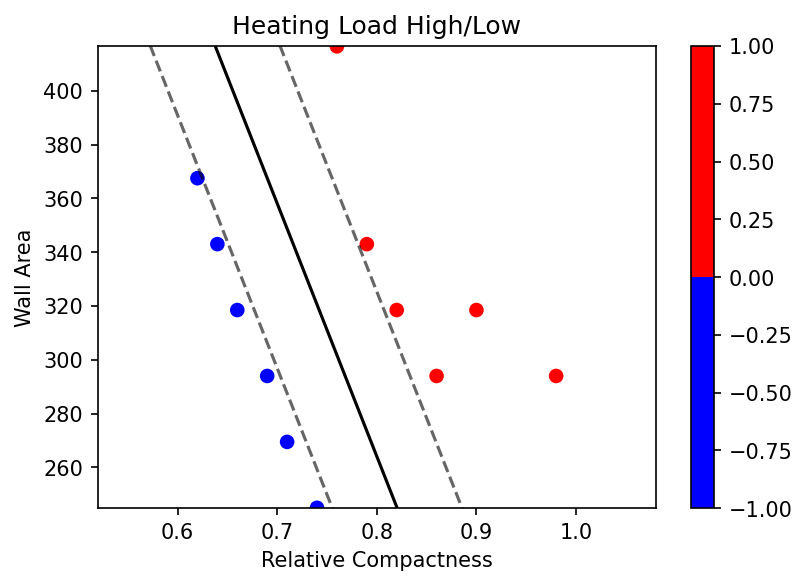

In [11]:
plt.figure(figsize=(6,4),dpi=150)
plot_data(X,y)

plot_SV_decision_boundary(svc_model)

plt.xlabel("Relative Compactness")
plt.ylabel("Wall Area")
plt.title("Heating Load High/Low")
plt.show()
